In [10]:
import numpy as np
import pandas as pd

In [11]:
test = pd.read_csv('Data/复赛/test.csv')
sub = pd.read_csv('Data/复赛/提交样例.csv')
temp = pd.read_csv('submissions/final/xgb_submission.csv').temperature

In [12]:
test_idx = sub[sub['time'].isin(test['时间戳'])].temperature.index

In [13]:
n = 10 # 起始数据
for i in test_idx[1:]:
    slope = (temp[i] - temp[n]) / (i - n)
    tmp = temp[n]
    for j in range(n+1, i+1):
        tmp += slope
        sub.loc[j, 'temperature'] = tmp
    n = i

In [14]:
sub.iloc[-109:, 1] = 12.0
# sub.iloc[-109:, 1] = temp.iloc[-109:] # 填充最后两小时
sub.to_csv('submissions/final/postprocess.csv', index=False)

<AxesSubplot:>

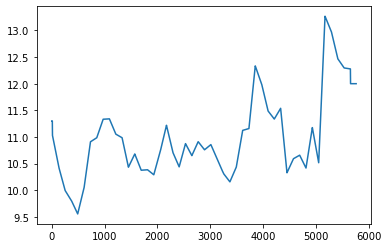

In [15]:
sub.temperature.plot()

<AxesSubplot:>

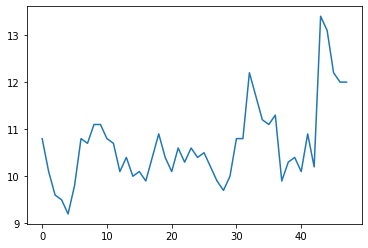

In [16]:
test['温度(室外)'].plot()